In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [103]:
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
np.random.seed(seed=13)
sig_f_cuad= 0.000158
b = 1
sig_e_cuad = 0.0045
val_k = 4
sig_b_cuad = 0.01
p = list(range(50, 201))
n = 80

In [30]:
eigens = [[],[],[],[],[]]
var_explicada_5 = []
for val_p in p:
  resultados_p = []
  resultados_p.append(val_p * sig_f_cuad *(sig_b_cuad + val_k * b**2) + sig_e_cuad)  
  for val_i in range(1,val_k):
    resultados_p.append(val_p * sig_f_cuad * sig_b_cuad + sig_e_cuad)
  for val_j in range(val_k, val_p):
    resultados_p.append(sig_e_cuad) 
  resultados_p.sort(reverse=True)
  cinco_top = resultados_p[0:5]
  for i in range(0,5):
    eigens[i].append(cinco_top[i])
  var_explicada_5.append(np.sum(np.abs(cinco_top))*100)  
  


Aquí se puede notar que el eigenvalor más grande crece conforme crece $p$ (recordando que $p$ es el número de activos en el portafolio) y todos los demás eigenvalores son relativamente pequeños al compararlos con el primer eigevalor. 

Si se toma en consideración que en análisis de factores, la contribución del factor $i$ (en este caso del activo $i$) a la varianza total del portafolio está dada por $\lambda_i$, entonces puede decirse que aún cuando agreguemos más y más activos al portafolio, siempre va a existir un activo particular que contribuya mucho más a explicar la varianza de los retornos del portafolio, y ésto no cambia cuando se van agregando más y más activos. 

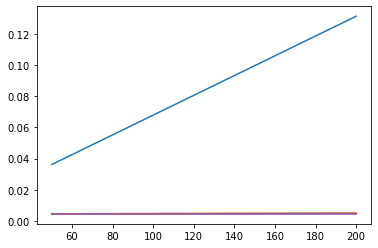

In [29]:
for ei in eigens:
    plt.plot(p, ei)

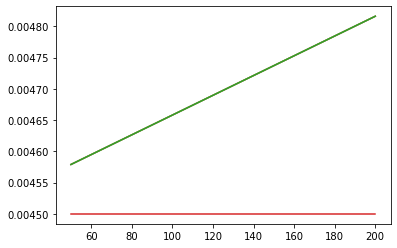

In [33]:
for ei in eigens[1:]:
    plt.plot(p,ei)

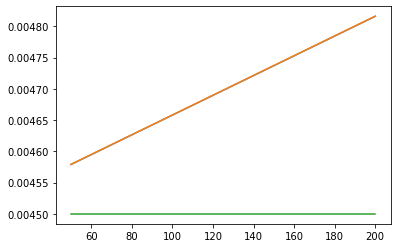

In [34]:
for ei in eigens[2:]:
    plt.plot(p,ei)

Considerando la siguiente igualdad 

$$ \Sigma = \sigma_f^2LL^t + \sigma_\epsilon^2 I_p$$

y suponiendo que $L \sim N(b 11^t, \sigma_b^2 I)$ con $\sigma_b^2 = 0.01$, $b = 1$, $\sigma_f^2 = 0.000158$ y $\sigma_e^2 = 0.0045$, es posible genear simulaciones de la matriz de varianza covarianza, obtener los eigenvalores de dicha matriz mediante simulación monte carlo y comprobar si también se presenta el fenómeno de tener un eigenvalor que crece conforme crece también el valor de p.

In [95]:
medias_eigen = [[],[],[],[],[]]
quantil_75 = []
quantil_25 = []
for val_p in p:
    res_eigen_sup=[[],[],[],[],[]]
    for iter in range(0,10):    
        identidad_p = np.identity(val_p)
        matriz_L = np.random.multivariate_normal(mean= b* np.ones(val_k), 
                                                 cov = sig_b_cuad*  np.identity(val_k),
                                                size = val_p)
        mat_sigma = sig_f_cuad * np.matmul(matriz_L,matriz_L.transpose()) + sig_e_cuad * np.identity(val_p)
        eigenvals = np.around( np.linalg.eigvals(mat_sigma), decimals=5)
        eigenvals[::-1].sort()
        for i in range(0,5):
            res_eigen_sup[i].append(eigenvals[i])
    quantil_75.append(np.quantile(res_eigen_sup[0], 0.75))
    quantil_25.append(np.quantile(res_eigen_sup[0], 0.25))
    for i in range(0,5):
        medias_eigen[i].append(np.mean(res_eigen_sup[i]))
        

/home/dum/miniconda3/envs/ds/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


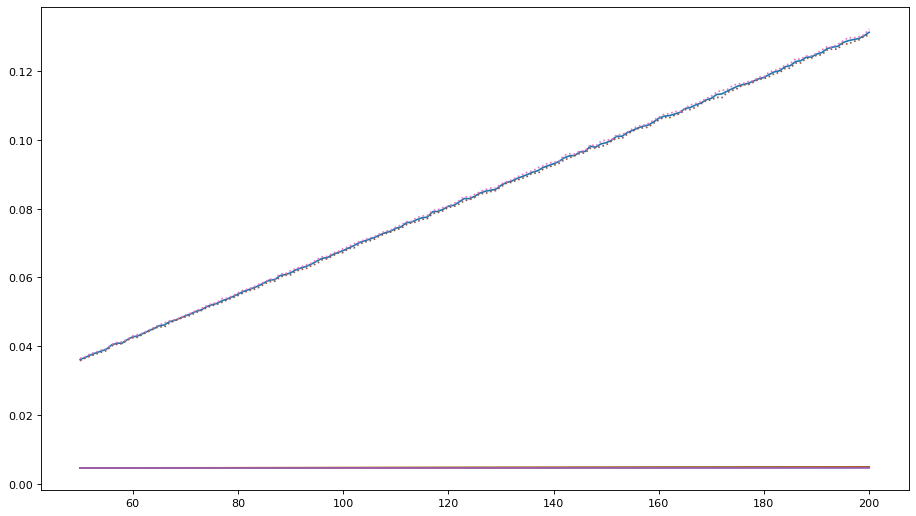

In [110]:
figure(figsize=(14, 8), dpi=80)

for ei in medias_eigen:
    plt.plot(p,ei)

plt.plot(p,quantil_25,ls= "dotted")
plt.plot(p,quantil_75, ls = "dotted")

/home/dum/miniconda3/envs/ds/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


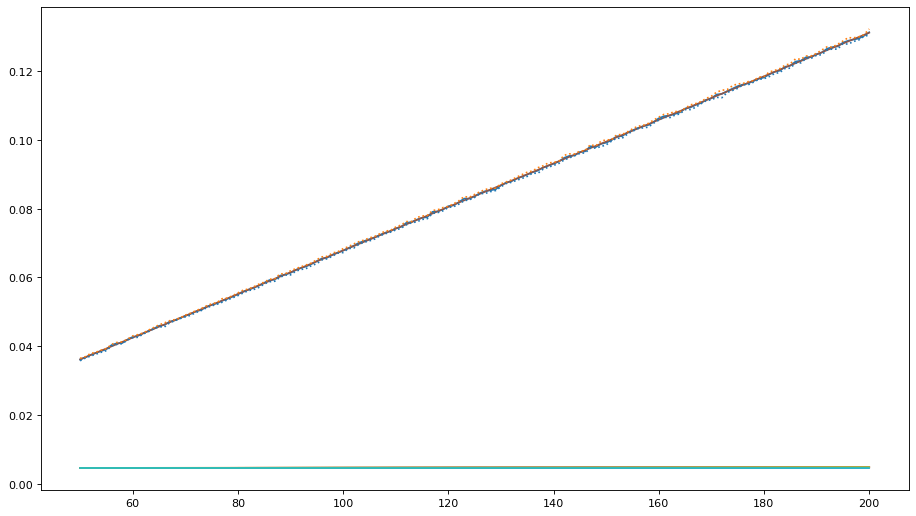

In [112]:
figure(figsize=(14, 8), dpi=80)

for ei in medias_eigen:
    plt.plot(p,ei)

for ei in eigens:
    plt.plot(p,ei)
plt.plot(p,quantil_25,ls= "dotted")
plt.plot(p,quantil_75, ls = "dotted")

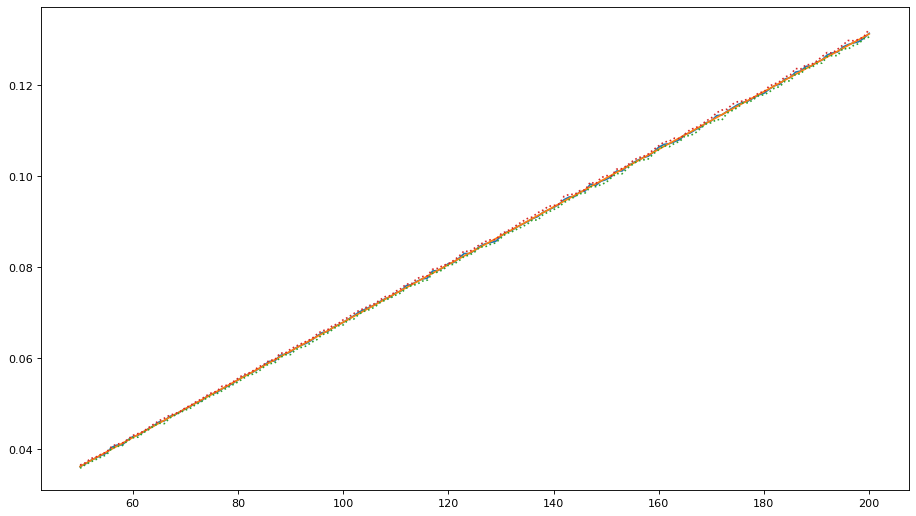

In [116]:
figure(figsize=(14, 8), dpi=80)
plt.plot(p, medias_eigen[0])
plt.plot(p, eigens[0])
plt.plot(p,quantil_25,ls= "dotted")
plt.plot(p,quantil_75, ls = "dotted")